## 1. Thu thập dữ liệu

* Dataset: Churn_Modelling
* Source: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/bank+marketing)
* Mục đích của tập dữ liệu: Tập dữ liệu này chứa thông tin chi tiết về khách hàng của ngân hàng và biến mục tiêu là biến nhị phân phản ánh thực tế là khách hàng rời ngân hàng (đóng tài khoản) hay tiếp tục là khách hàng.

## 2. Chuẩn bị dữ liệu (Data Preparation)
Các vấn đề trong chuẩn bị dữ liệu
* Thăm dò dữ liệu
* Làm sạch dữ liệu
* Tích hợp dữ liệu
* Biến đổi, rời rạc hóa và chuẩn hóa dữ liệu
* Cân bằng dữ liệu
* Rút gọn thuộc tính
* ...

### 2.1. Thăm dò dữ liệu (Exploratory Data Analysis)
**Bước 1**: Đọc kỹ mô tả về tập dữ liệu tại trang download [UCI Machine Learning Repository: Bank Marketing Data Set](https://archive.ics.uci.edu/ml/datasets/bank+marketing)

**Bước 2**: Trong thư mục download, có file *"bank-names.txt"* có một vài mô tả về tập dữ liệu. Cũng nên đọc qua file này.

Sau bước 1 và bước 2, chúng ta có thông tin cơ bản: tập dữ liệu gồm 17 thuộc tính, tạm chia thành 3 mục:

#### bank client data
* age (numeric)
* job: type of job (categorical)
    * admin
    * unknown
    * unemployed
    * management
    * housemaid
    * entrepreneur
    * student
    * blue-collar (người lao động làm công việc tay chân)
    * self-employed
    * retired
    * technician
    * services
* marital: marital status (categorical)
    * married
    * divorced (divorced means divorced or widowed)
    * single
* education (categorical)
    * unknown
    * secondary
    * primary
    * tertiary
* default: has credit in default? (binary: "yes","no")
* balance: average yearly balance, in euros (numeric) 
* housing: has housing loan? (binary: "yes","no")
* loan: has personal loan? (binary: "yes","no")

#### related with the last contact of the current campaign
* contact: contact communication type (categorical)
    * unknown
    * telephone
    * cellular
* day: last contact day of the month (numeric)
* month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
* duration: last contact duration, in seconds (numeric)

#### other attributes
* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client (numeric)
* poutcome: outcome of the previous marketing campaign (categorical) 
    * unknown
    * other
    * failure
    * success

#### Output variable (desired target/label)
* y - has the client subscribed a term deposit? (binary: "yes","no")

**Bước 3**: Sử dụng các thư viện **pandas, matplotlib** để thăm dò sâu hơn

In [1]:
%matplotlib inline

# Import các thư viện cần thiết
import os
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


# Khởi tạo 1 số hằng số hỗ trợ
BASE_DIR = os.getcwd()
DATA_FILE = os.path.join(BASE_DIR, 'Data', 'Churn_Modelling.csv')

Ở bước này, chúng ta có thể thực hiện các thao tác:
* Load dữ liệu vào cấu trúc dữ liệu DataFrame của thư viện Pandas. Pandas hỗ trợ đọc từ các file dữ liệu thông dụng như csv, excel, sql...
* In thử $n$ dòng của tập dữ liệu để quan sát. Có thể sử dụng phương thức head và tail của DataFrame với tham số n là số dòng muốn xem.
* Sử dụng các phương thức info, describe của DataFrame để xem mô tả và thống kê về tập dữ liệu

In [2]:
df = pd.read_csv(DATA_FILE, sep=',')
df.head(n=10)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
5          6    15574012       Chu          645     Spain    Male   44   
6          7    15592531  Bartlett          822    France    Male   50   
7          8    15656148    Obinna          376   Germany  Female   29   
8          9    15792365        He          501    France    Male   44   
9         10    15592389        H?          684    France    Male   27   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   
5       8  113755.78              2          1               0   
6       7       0.00              2          1               1   
7       4  115046.74              4          1               0   
8       4  142051.07              2          0               1   
9       2  134603.88              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0  
5        149756.71       1  
6         10062.80       0  
7        119346.88       1  
8         74940.50       0  
9         71725.73       0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Có thể dễ dàng nhận thấy 1 số thông tin cơ bản như**:
* 45211 dòng (rows, entries)
* 17 cột (columns, features, attributes)
* tên thuộc tính - số lượng giá trị tương ứng (nhìn vào đây có thể xác định tập dữ liệu có bị thiếu hay không)
* Kiểu dữ liệu

In [4]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

Phương thức describe đặc tả một số giá trị thống kê (chỉ các cột có kiểu dữ liệu số). Để hiểu rõ hơn có thể tìm hiểu về khái niệm **Tứ phân vị** (khoảng trải giữa - Interquartile range - IQR)

Quan sát kết quả của phương thức describe, chúng ta sẽ có những thông tin ban đầu. Ví dụ với thuộc tính **age**
* min = 18 tuổi
* max = 95 tuổi
* mean ~ 41
=> Đối tượng khách hàng dựa trên độ tuổi của ngân hàng này rất hơn (chỉ trên 18 tuổi mà không tập trung vào 1 khoảng cụ thể ???)

Bên cạnh đó, chúng ta có thể sử dụng thêm các thư viện hỗ trợ như **Pandas Profiling** để nắm được nhiều thông tin hơn về tập dữ liệu

In [5]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Visualization 
Mặc dù chúng ta có rất nhiều công cụ hỗ trợ, tuy nhiên dữ liệu dạng bảng và các thống kê dưới dạng các con số cũng gây nhầm lẫn. Ở 1 số trường hợp, việc trực quan hóa rất quan trọng. Thư viện **matplotlib, seaborn** sẽ hỗ trợ chúng ta thực hiện. Dưới đây là một số ví dụ

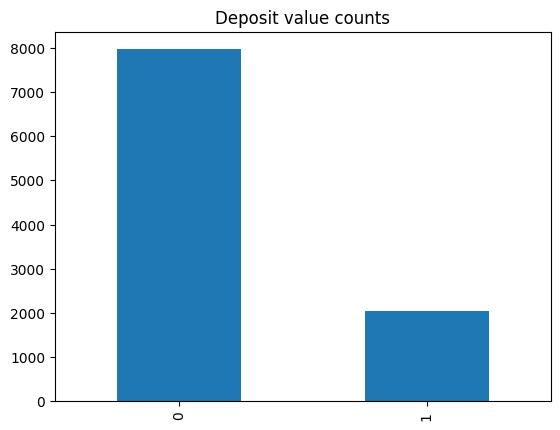

In [6]:
# Phân bố giữa 2 nhóm: tiếp tục và không tiếp tục
value_counts = df['Exited'].value_counts()
value_counts.plot.bar(title = 'Deposit value counts')
plt.show()

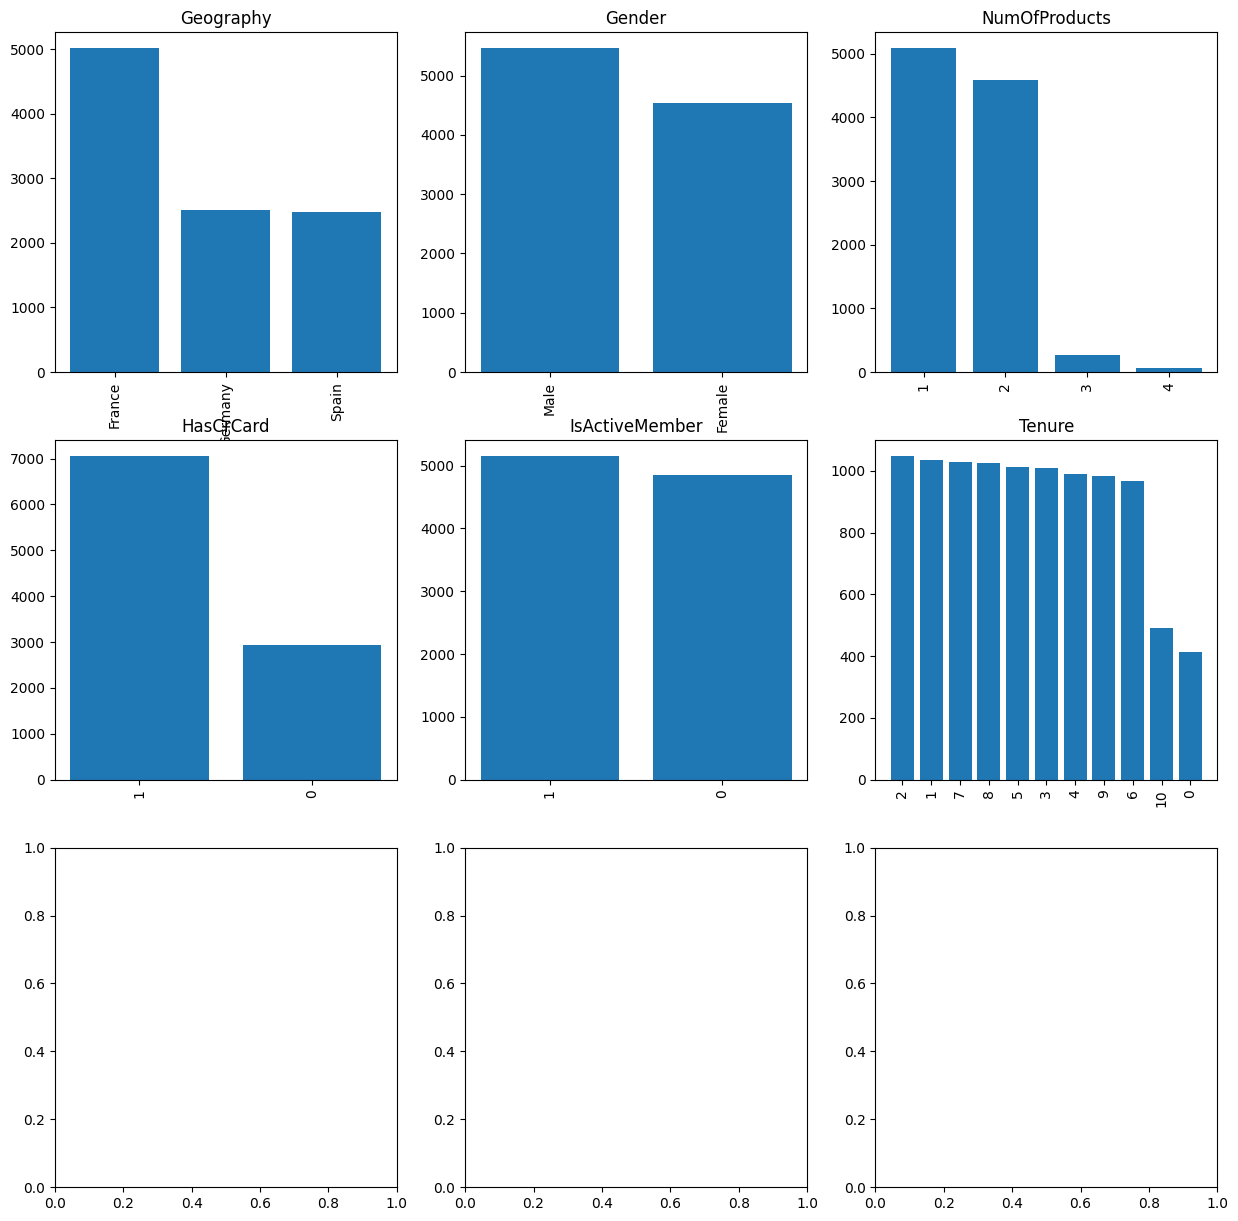

In [23]:
"""
    Xem thử phân bố của các cột dữ liệu có kiểu categorical
"""
cat_columns = [
    'Geography',
    'Gender',
    'NumOfProducts',
    'HasCrCard',
    'IsActiveMember',
    'Tenure'
]

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(15, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

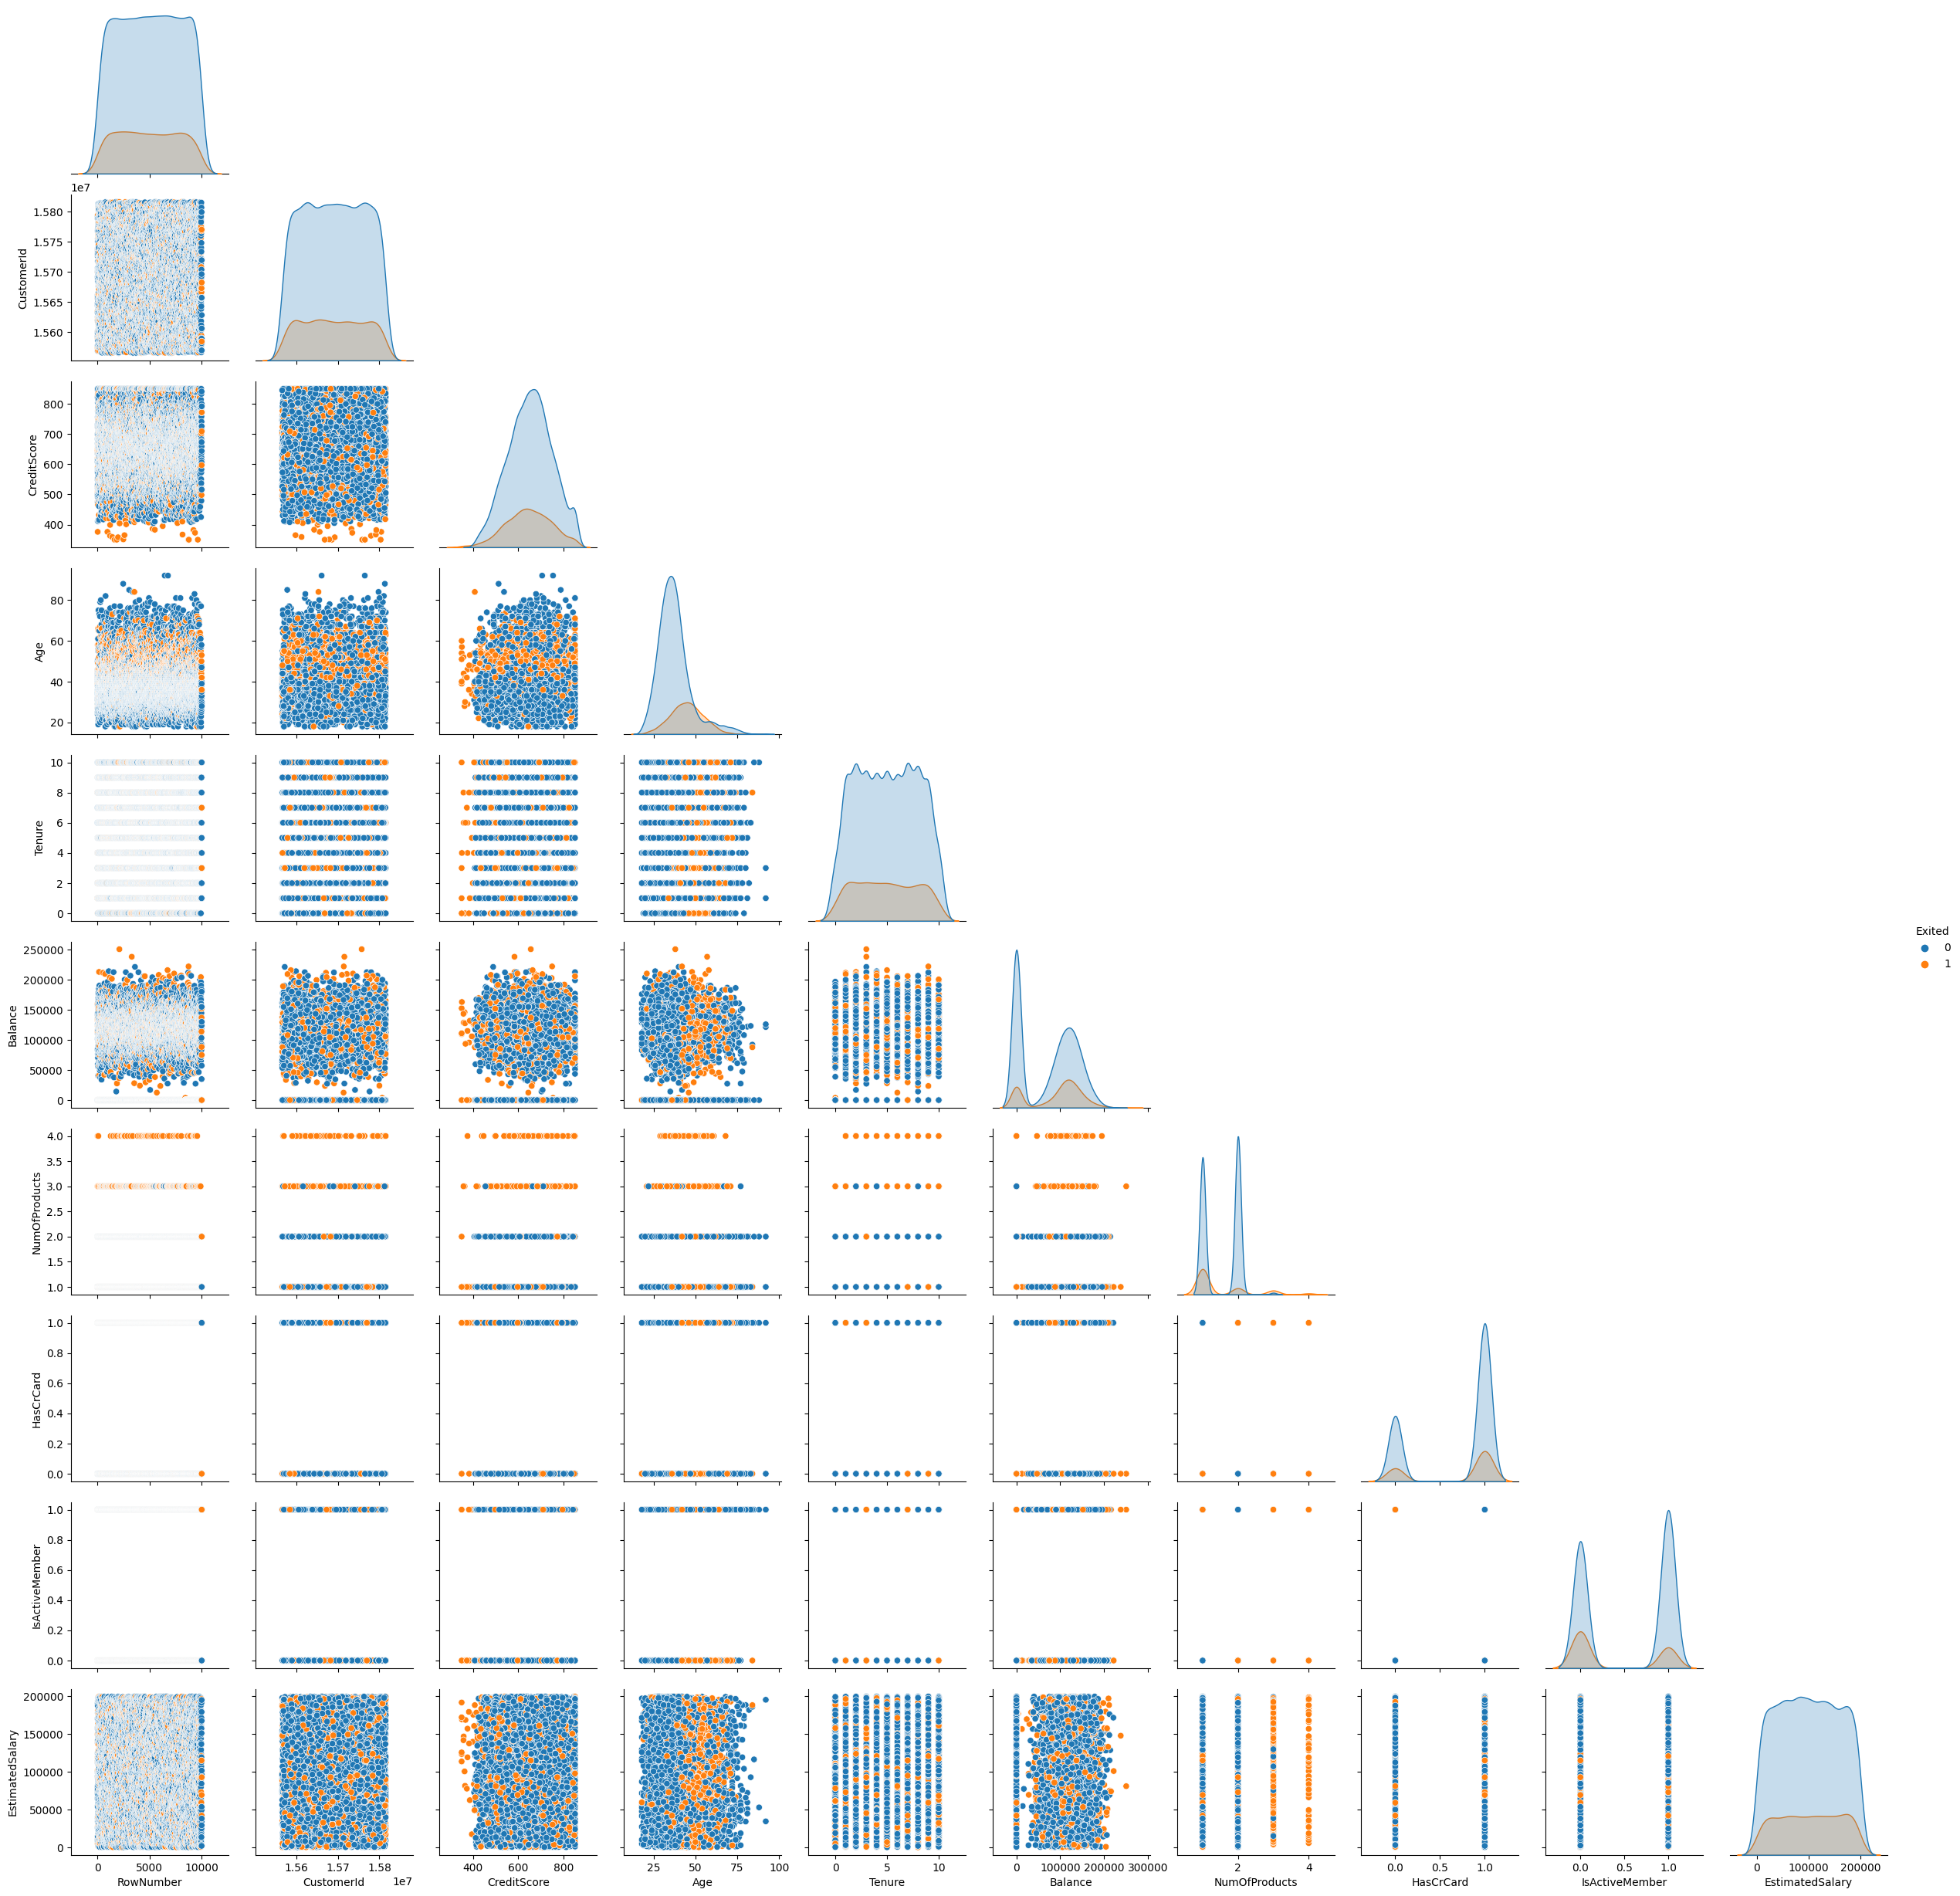

In [24]:
sns.pairplot(df,hue='Exited',corner=True)
plt.show()

Ngoài các ví dụ trên, tùy tập dữ liệu, kiểu dữ liệu của các thuộc tính, ngữ cảnh... chúng ta có thể sử dụng các loại biểu đồ khác.

### 2.2. Làm sạch dữ liệu
Dựa vào tình hình của việc thăm dò dữ liệu, cũng như mô hình dự kiến và nền tảng hiện thực, chúng ta sẽ tiến hành làm sạch dữ liệu

* Do tập dữ liệu này không bị thiếu -> không cần xử lý dữ liệu thiếu
* Mặc dù mô hình dự kiến là Decision tree làm việc khá tốt với dữ liệu categorical. Tuy nhiên thư viện sklearn chỉ nhận input data dưới dạng số -> cần mã hóa (encode) dữ liệu

In [41]:
def get_dummy_from_bool(row, column_name):
    return 1 if row[column_name] == 'yes' else 0

def get_correct_values(row, column_name, threshold, df):
    if row[column_name] <= threshold:
        return row[column_name]
    else:
        mean = df[df[column_name] <= threshold][column_name].mean()
        return mean

def clean_data(df):
    
    cleaned_df = df.copy()
    
    #convert columns containing 'yes' and 'no' values to boolean variables and drop original columns
    ''' bool_columns = ['HasCrCard', 'IsActiveMember', 'Exited']
    for bool_col in bool_columns:
        cleaned_df[bool_col + '_bool'] = df.apply(lambda row: get_dummy_from_bool(row, bool_col),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = bool_columns)'''
    
    #convert categorical columns to dummies
    cat_columns = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember','Tenure', 'Exited']
    
    for col in  cat_columns:
        cleaned_df = pd.concat([cleaned_df.drop(col, axis=1),
                                pd.get_dummies(cleaned_df[col], prefix=col, prefix_sep='_',
                                               drop_first=True, dummy_na=False)], axis=1)
    
    #drop irrelevant columns
    cleaned_df = cleaned_df.drop(columns = ['Surname'])
    
    #impute incorrect values and drop original columns
    
    return cleaned_df

#### Mã hóa 

* Chuyển các cột có giá trị 'yes' và 'no' -> 1, 0
* Chuyển các cột categorical -> dummy variables

In [43]:
cleaned_df = clean_data(df)
cleaned_df.head()

RowNumber  CustomerId  CreditScore  Age    Balance  EstimatedSalary  \
0          1    15634602          619   42       0.00        101348.88   
1          2    15647311          608   41   83807.86        112542.58   
2          3    15619304          502   42  159660.80        113931.57   
3          4    15701354          699   39       0.00         93826.63   
4          5    15737888          850   43  125510.82         79084.10   

   Geography_Germany  Geography_Spain  Gender_Male  NumOfProducts_2  ...  \
0                  0                0            0                0  ...   
1                  0                1            0                0  ...   
2                  0                0            0                0  ...   
3                  0                0            0                1  ...   
4                  0                1            0                0  ...   

   Tenure_2  Tenure_3  Tenure_4  Tenure_5  Tenure_6  Tenure_7  Tenure_8  \
0         1         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         1   
3         0         0         0         0         0         0         0   
4         1         0         0         0         0         0         0   

   Tenure_9  Tenure_10  Exited_1  
0         0          0         1  
1         0          0         0  
2         0          0         1  
3         0          0         0  
4         0          0         0  

[5 rows x 25 columns]

In [44]:
X = cleaned_df.drop(columns = 'Exited_1')
y = cleaned_df[['Exited_1']]


print(X.shape)
print(y.shape)

(10000, 24)
(10000, 1)


## 3. Lựa chọn mô hình
Sử dụng **Decision Tree** vì:
* Tập dữ liệu có nhiều thuộc tính categorical
* Mô hình **đơn giản** và **trực quan**

## 4. Huấn luyện mô hình
Tập dữ liệu được chia thành 2 phần **train** và **test** với tỉ lệ 7-3 và được huấn luyện bằng thư viện sklearn.

In [45]:
TEST_SIZE = 0.3
RAND_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = TEST_SIZE, random_state=RAND_STATE
)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7000, 24)
(7000, 1)
(3000, 24)
(3000, 1)


## NOTE

In [46]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

## 5. Đánh giá mô hình

C:\Users\LENOVO\OneDrive\Máy tính\AI\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


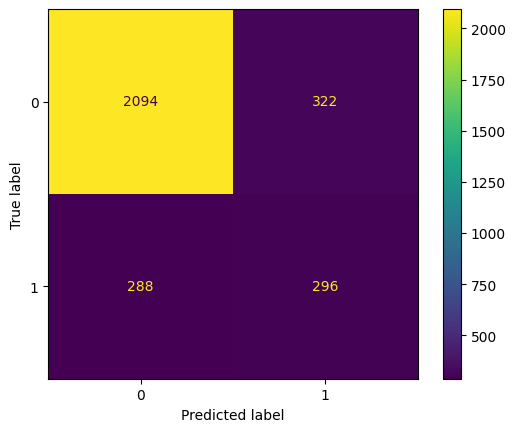

In [47]:
y_pred = clf.predict(X_test)
plot_confusion_matrix(clf, X_test, y_test)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      2416
           1       0.48      0.51      0.49       584

    accuracy                           0.80      3000
   macro avg       0.68      0.69      0.68      3000
weighted avg       0.80      0.80      0.80      3000

